In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# Loading the Iris dataset

iris = load_iris()
X = iris.data[:, 2:] # Selecting the two last columns
y = iris.target

target_names = iris.target_names
features_names = iris.feature_names

In [15]:
# Restrict ourselves to two classes

X = X[np.logical_or(y == 1, y == 2)]
y = y[np.logical_or(y == 1, y == 2)]

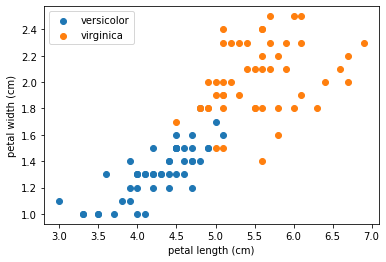

In [16]:
# Plotting

plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label=target_names[1])
plt.scatter(X[y == 2][:,0], X[y == 2][:,1], label=target_names[2])
plt.xlabel(features_names[2])
plt.ylabel(features_names[3])
plt.legend()
plt.show()

In [103]:
def gini(partition):
    partition_sum = partition.sum()
    G = 1 - ((partition/partition_sum)**2).sum()
    return G

In [132]:
# Loop through features and feature values, calculate information gain and find the best separation boundary

gini_old = gini(y)
information_gain_array = np.zeros(X.shape)

for j in range(X.shape[1]):
    for i in range(X.shape[0]):
        thr = X[i,j]

        true_branch = X[X[:,j] >= thr]
        false_branch = X[X[:,j] < thr]

        true_branch_labels = y[X[:,j] >= thr]
        false_branch_labels = y[X[:,j] < thr]

        _, node_value_true = np.unique(true_branch_labels, return_counts=True)
        _, node_value_false = np.unique(false_branch_labels, return_counts=True)
        
        gini_true = gini(node_value_true)
        n_gini_true = gini_true.sum() 

        gini_false = gini(node_value_false)
        n_gini_false = gini_false.sum()

        n_gini_total = n_gini_true + n_gini_false

        weighted_mean_gini = (gini_true*n_gini_true + gini_false*n_gini_false)/n_gini_total
        information_gain = gini_old - weighted_mean_gini
        information_gain_array[i,j] = information_gain
        
flat_index = information_gain_array.argmax()
max_gain_index = np.unravel_index(flat_index, information_gain_array.shape)

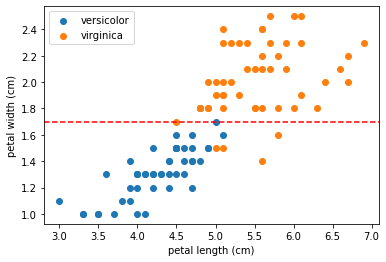

In [133]:
plt.scatter(X[y == 1][:,0], X[y == 1][:,1], label=target_names[1])
plt.scatter(X[y == 2][:,0], X[y == 2][:,1], label=target_names[2])
plt.axhline(y=X[max_gain_index], c='r', ls='--')
plt.xlabel(features_names[2])
plt.ylabel(features_names[3])
plt.legend()
plt.show()

In [ ]:
# Creating a new branch for the False side



In [ ]:
# Creating a new branch for the True side



In [ ]:
# Decisions trees data do not need to be scaled or centered